# Difusividad Espectral

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
import numpy as np

## Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_context("paper", font_scale = 1.6)
plt.style.use(["science", "grid"])

## Funciones

In [3]:
def dmas(a, b, freq, norma):
    arcotan = np.arctan(-2 * b * freq / (a ** 2))
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = - (2 * a * b * cc) / ((dd + a) ** 2 + cc ** 2)
    ima = - b + (2 * a * b * (dd + a)) / ((dd + a) ** 2 + cc ** 2)
    
    return reg, ima

In [4]:
def imas(a, b, freq, norma):
    arcotan = np.arctan((2 * b * freq / (a ** 2)) + np.pi)
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = - (2 * a * b * cc) / ((dd - a) ** 2 + cc ** 2)
    ima = b + (2 * a * b * (dd - a)) / ((dd - a) ** 2 + cc ** 2)
    
    return reg, ima

In [5]:
def dmenos(a, b, freq, norma):
    arcotan = np.arctan((-2 * b * freq / (a ** 2)) + np.pi)
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = (2 * a * b * cc) / ((dd - a) ** 2 + cc ** 2)
    ima = - b + (2 * a * b * (a - dd)) / ((dd - a) ** 2 + cc ** 2)
    
    return reg, ima

In [6]:
def imenos(a, b, freq, norma):
    arcotan = np.arctan((2 * b * freq / (a ** 2)))
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = (2 * a * b * cc) / ((dd + a) ** 2 + cc ** 2)
    ima = b - (2 * a * b * (a + dd)) / ((dd + a) ** 2 + cc ** 2)
    
    return reg, ima

## Archivos

In [7]:
frecuencias = np.loadtxt("datos/frecuencias_heatmap.csv")
nf = frecuencias.size

In [8]:
exponentes = np.loadtxt("datos/exponente_heatmap.csv").astype(int)
nexp = exponentes.size

## Listas de $A$ y $B$

In [9]:
lista_a = np.array([-0.480, -0.480, -0.481, -0.482, -0.480, -0.459, -0.452, -0.468, -0.464, -0.485])
lista_b = np.array([0.113, 0.242, 0.362, 0.455, 0.48, 0.527, 0.582, 0.626, 0.661, 0.691, 0.716])

In [10]:
regamadmas = np.empty((nexp, nf))
imgamadmas = np.empty((nexp, nf))

regamaimas = np.empty((nexp, nf))
imgamaimas = np.empty((nexp, nf))

regamadmenos = np.empty((nexp, nf))
imgamadmenos = np.empty((nexp, nf))

regamaimenos = np.empty((nexp, nf))
imgamaimenos = np.empty((nexp, nf))

for e in range(nexp):
    a = lista_a[e]
    b = lista_b[e]
    
    norma = ((a ** 4) + (16 * (b ** 2) * (frecuencias ** 2))) ** 0.25
    
    regamadmas[e], imgamadmas[e] = dmas(a, b, frecuencias, norma)
    regamaimas[e], imgamaimas[e] = imas(a, b, frecuencias, norma)
    regamadmenos[e], imgamaimenos[e] = dmenos(a, b, frecuencias, norma)
    regamaimenos[e], imgamaimenos[e] = imenos(a, b, frecuencias, norma)

In [11]:
datos = np.abs(np.abs(imgamadmas) + np.abs(imgamadmenos) - np.abs(imgamaimas) - np.abs(imgamaimenos))

In [12]:
df = pd.DataFrame(data = datos, index = np.round(exponentes, 5), columns = np.round(frecuencias, 5))
df

,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,10.000,20.000,30.000,40.000,50.000,60.000,70.000,80.000,90.000,100.000
1,5.588642e-08,2.243944e-07,5.067953e-07,9.043576e-07,0.000001,0.000002,0.000003,0.000004,0.000005,0.000006,...,0.178111,0.155828,0.146841,0.141744,0.138373,0.135941,0.134081,0.132603,0.131391,0.130375
2,5.513093e-07,2.223060e-06,5.041896e-06,9.034341e-06,0.000014,0.000021,0.000028,0.000037,0.000048,0.000059,...,0.330105,0.301238,0.289318,0.282452,0.277866,0.274532,0.271969,0.269922,0.268239,0.266824
3,1.837282e-06,7.437114e-06,1.693080e-05,3.044873e-05,0.000048,0.000070,0.000096,0.000127,0.000163,0.000203,...,0.466667,0.433050,0.418992,0.410843,0.405378,0.401394,0.398325,0.395869,0.393847,0.392145
4,3.628982e-06,1.473253e-05,3.363344e-05,6.065159e-05,0.000096,0.000140,0.000194,0.000256,0.000328,0.000411,...,0.570848,0.534004,0.518499,0.509483,0.503426,0.499003,0.495593,0.492862,0.490612,0.488717
5,4.336220e-06,1.761982e-05,4.026036e-05,7.266342e-05,0.000115,0.000168,0.000232,0.000308,0.000395,0.000494,...,0.598045,0.560596,0.544812,0.535627,0.529452,0.524942,0.521464,0.518678,0.516383,0.514449
6,6.885182e-06,2.806251e-05,6.430807e-05,1.163887e-04,0.000185,0.000271,0.000375,0.000498,0.000640,0.000803,...,0.644038,0.607170,0.591560,0.582456,0.576328,0.571847,0.568390,0.565619,0.563334,0.561409
7,9.887650e-06,4.040072e-05,9.280204e-05,1.683370e-04,0.000268,0.000394,0.000546,0.000726,0.000935,0.001175,...,0.702286,0.664571,0.648555,0.639200,0.632898,0.628287,0.624727,0.621873,0.619519,0.617535
8,1.070652e-05,4.374958e-05,1.005009e-04,1.823132e-04,0.000291,0.000426,0.000591,0.000786,0.001013,0.001273,...,0.755144,0.714656,0.697461,0.687418,0.680651,0.675701,0.671879,0.668814,0.666287,0.664157
9,1.306585e-05,5.347120e-05,1.230087e-04,2.234439e-04,0.000357,0.000524,0.000727,0.000968,0.001249,0.001570,...,0.792100,0.751099,0.733659,0.723465,0.716593,0.711564,0.707681,0.704567,0.701998,0.699832
10,1.249215e-05,5.107511e-05,1.173920e-04,2.130624e-04,0.000340,0.000499,0.000692,0.000921,0.001187,0.001491,...,0.831417,0.787436,0.768746,0.757827,0.750469,0.745085,0.740928,0.737595,0.734845,0.732528


## Gráfica

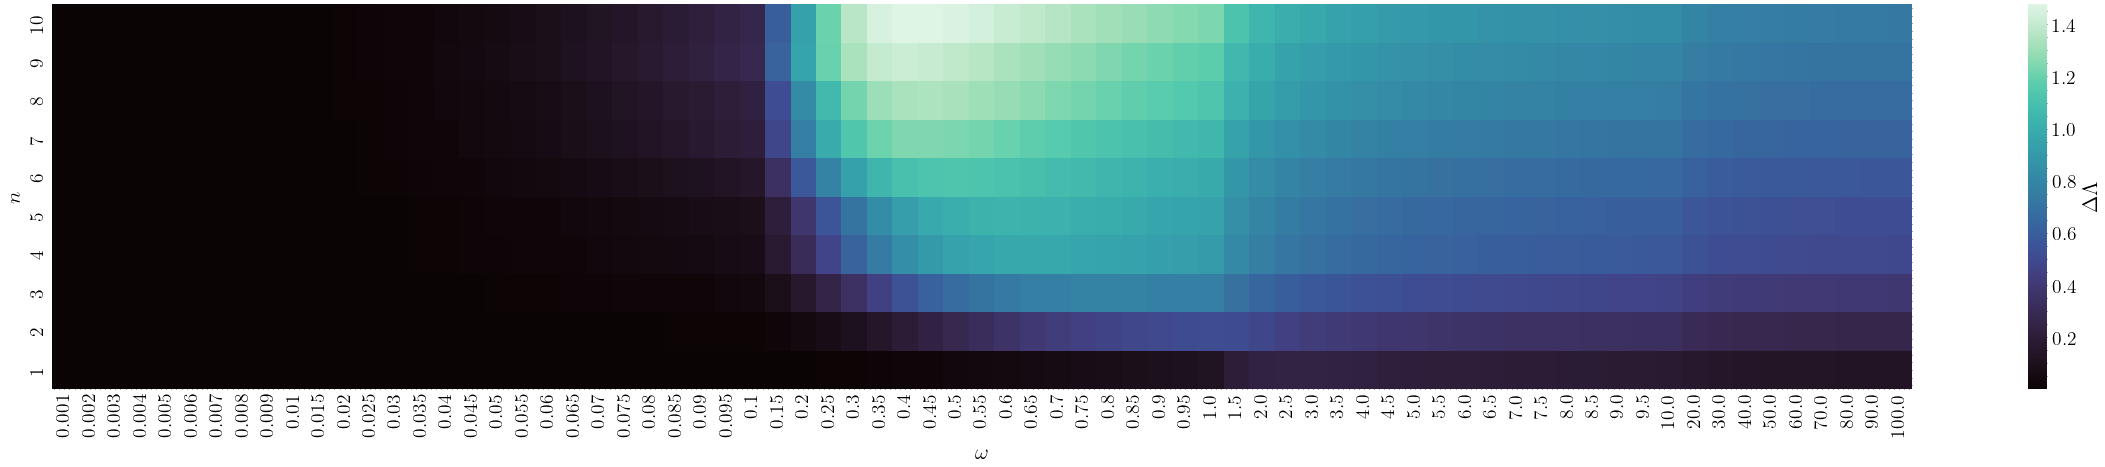

In [13]:
plt.figure(figsize = (30, 5))
ax = sns.heatmap(data = df, cmap = "mako", cbar_kws = {"label" : "$\Delta \Lambda$"}, vmax = np.max(datos), vmin = np.min(datos), robust = True, linewidths = 0.0)
ax.set(xlabel="$\omega$",
       ylabel="$n$",)
ax.invert_yaxis()
plt.savefig("graficas/difusividad_espectral_heatmap.png", dpi = 300.0, bbox_inches = "tight")
plt.show()